## Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

np.random.seed(1234)
tf.random.set_seed(1234)
plt.rcParams["font.family"] = "serif"

2024-05-09 10:31:20.286669: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 10:31:20.340660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data for post processing

In [2]:
act_disc_model = tf.keras.models.load_model('Saved_model')

angles = np.linspace(-30,30,1001)

D = 30.1
for i in [2.5*D,5.5*D,8*D]:
    X,Y,Z = np.meshgrid(np.array([i]),np.tan(angles*np.pi/180)*i,np.array([35]))
    test_data = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None]))
    test_data = tf.cast(test_data,tf.float32)
    if i==2.5*D:
        PINN_2_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    elif i==5.5*D:
        PINN_5_5D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])
    else:
        PINN_8D = act_disc_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])


2024-05-09 10:31:23.130376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46858 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:c3:00.0, compute capability: 8.6


32/32 [==============================] - 0s 5ms/step


2024-05-09 10:31:25.030052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


32/32 [==============================] - 0s 4ms/step


In [3]:
#Velocity data
data_25D_nibe = pd.read_csv('Data/Velocity/25D.csv')
data_4D_nibe = pd.read_csv('Data/Velocity/55D.csv')
data_75D_nibe = pd.read_csv('Data/Velocity/8D.csv')
theta_kw_25D,kw_25D,theta_ke_25D,ke_25D,theta_sst_25D,sst_25D,theta_rsm_25D,rsm_25D,theta_data_25D,data_25D = data_25D_nibe['theta_kw'],data_25D_nibe['kw'],data_25D_nibe['theta_ke'],data_25D_nibe['ke'],data_25D_nibe['theta_sst'],data_25D_nibe['sst'],data_25D_nibe['theta_rsm'],data_25D_nibe['rsm'],data_25D_nibe['theta_data'],data_25D_nibe['data']
theta_kw_4D,kw_4D,theta_ke_4D,ke_4D,theta_sst_4D,sst_4D,theta_rsm_4D,rsm_4D,theta_data_4D,data_4D = data_4D_nibe['theta_kw'],data_4D_nibe['kw'],data_4D_nibe['theta_ke'],data_4D_nibe['ke'],data_4D_nibe['theta_sst'],data_4D_nibe['sst'],data_4D_nibe['theta_rsm'],data_4D_nibe['rsm'],data_4D_nibe['theta_data'],data_4D_nibe['data']
theta_kw_75D,kw_75D,theta_ke_75D,ke_75D,theta_sst_75D,sst_75D,theta_rsm_75D,rsm_75D,theta_data_75D,data_75D = data_75D_nibe['theta_kw'],data_75D_nibe['kw'],data_75D_nibe['theta_ke'],data_75D_nibe['ke'],data_75D_nibe['theta_sst'],data_75D_nibe['sst'],data_75D_nibe['theta_rsm'],data_75D_nibe['rsm'],data_75D_nibe['theta_data'],data_75D_nibe['data']

In [4]:
#TKE
data_25DK_nibe = pd.read_csv('Data/TKE/25DK.csv')
data_4DK_nibe = pd.read_csv('Data/TKE/55DK.csv')
data_75DK_nibe = pd.read_csv('Data/TKE/8DK.csv')
theta_kw_25DK,kw_25DK,theta_ke_25DK,ke_25DK,theta_sst_25DK,sst_25DK,theta_rsm_25DK,rsm_25DK,theta_data_25DK,data_25DK = data_25DK_nibe['theta_kw'],data_25DK_nibe['kw'],data_25DK_nibe['theta_ke'],data_25DK_nibe['ke'],data_25DK_nibe['theta_sst'],data_25DK_nibe['sst'],data_25DK_nibe['theta_rsm'],data_25DK_nibe['rsm'],data_25DK_nibe['theta_data'],data_25DK_nibe['data']
theta_kw_4DK,kw_4DK,theta_ke_4DK,ke_4DK,theta_sst_4DK,sst_4DK,theta_rsm_4DK,rsm_4DK,theta_data_4DK,data_4DK = data_4DK_nibe['theta_kw'],data_4DK_nibe['kw'],data_4DK_nibe['theta_ke'],data_4DK_nibe['ke'],data_4DK_nibe['theta_sst'],data_4DK_nibe['sst'],data_4DK_nibe['theta_rsm'],data_4DK_nibe['rsm'],data_4DK_nibe['theta_data'],data_4DK_nibe['data']
theta_kw_75DK,kw_75DK,theta_ke_75DK,ke_75DK,theta_sst_75DK,sst_75DK,theta_rsm_75DK,rsm_75DK,theta_data_75DK,data_75DK = data_75DK_nibe['theta_kw'],data_75DK_nibe['kw'],data_75DK_nibe['theta_ke'],data_75DK_nibe['ke'],data_75DK_nibe['theta_sst'],data_75DK_nibe['sst'],data_75DK_nibe['theta_rsm'],data_75DK_nibe['rsm'],data_75DK_nibe['theta_data'],data_75DK_nibe['data']

In [5]:
u_2_5D = np.sqrt(np.square(PINN_2_5D[0])+np.square(PINN_2_5D[1])+np.square(PINN_2_5D[2]))
u_5_5D = np.sqrt(np.square(PINN_5_5D[0])+np.square(PINN_5_5D[1])+np.square(PINN_5_5D[2]))
u_8D = np.sqrt(np.square(PINN_8D[0])+np.square(PINN_8D[1])+np.square(PINN_8D[2]))

TKE_2_5D = PINN_2_5D[4]/(10**2)
TKE_5_5D = PINN_5_5D[4]/(10**2)
TKE_8D = PINN_8D[4]/(10**2)

# Velocity Plots

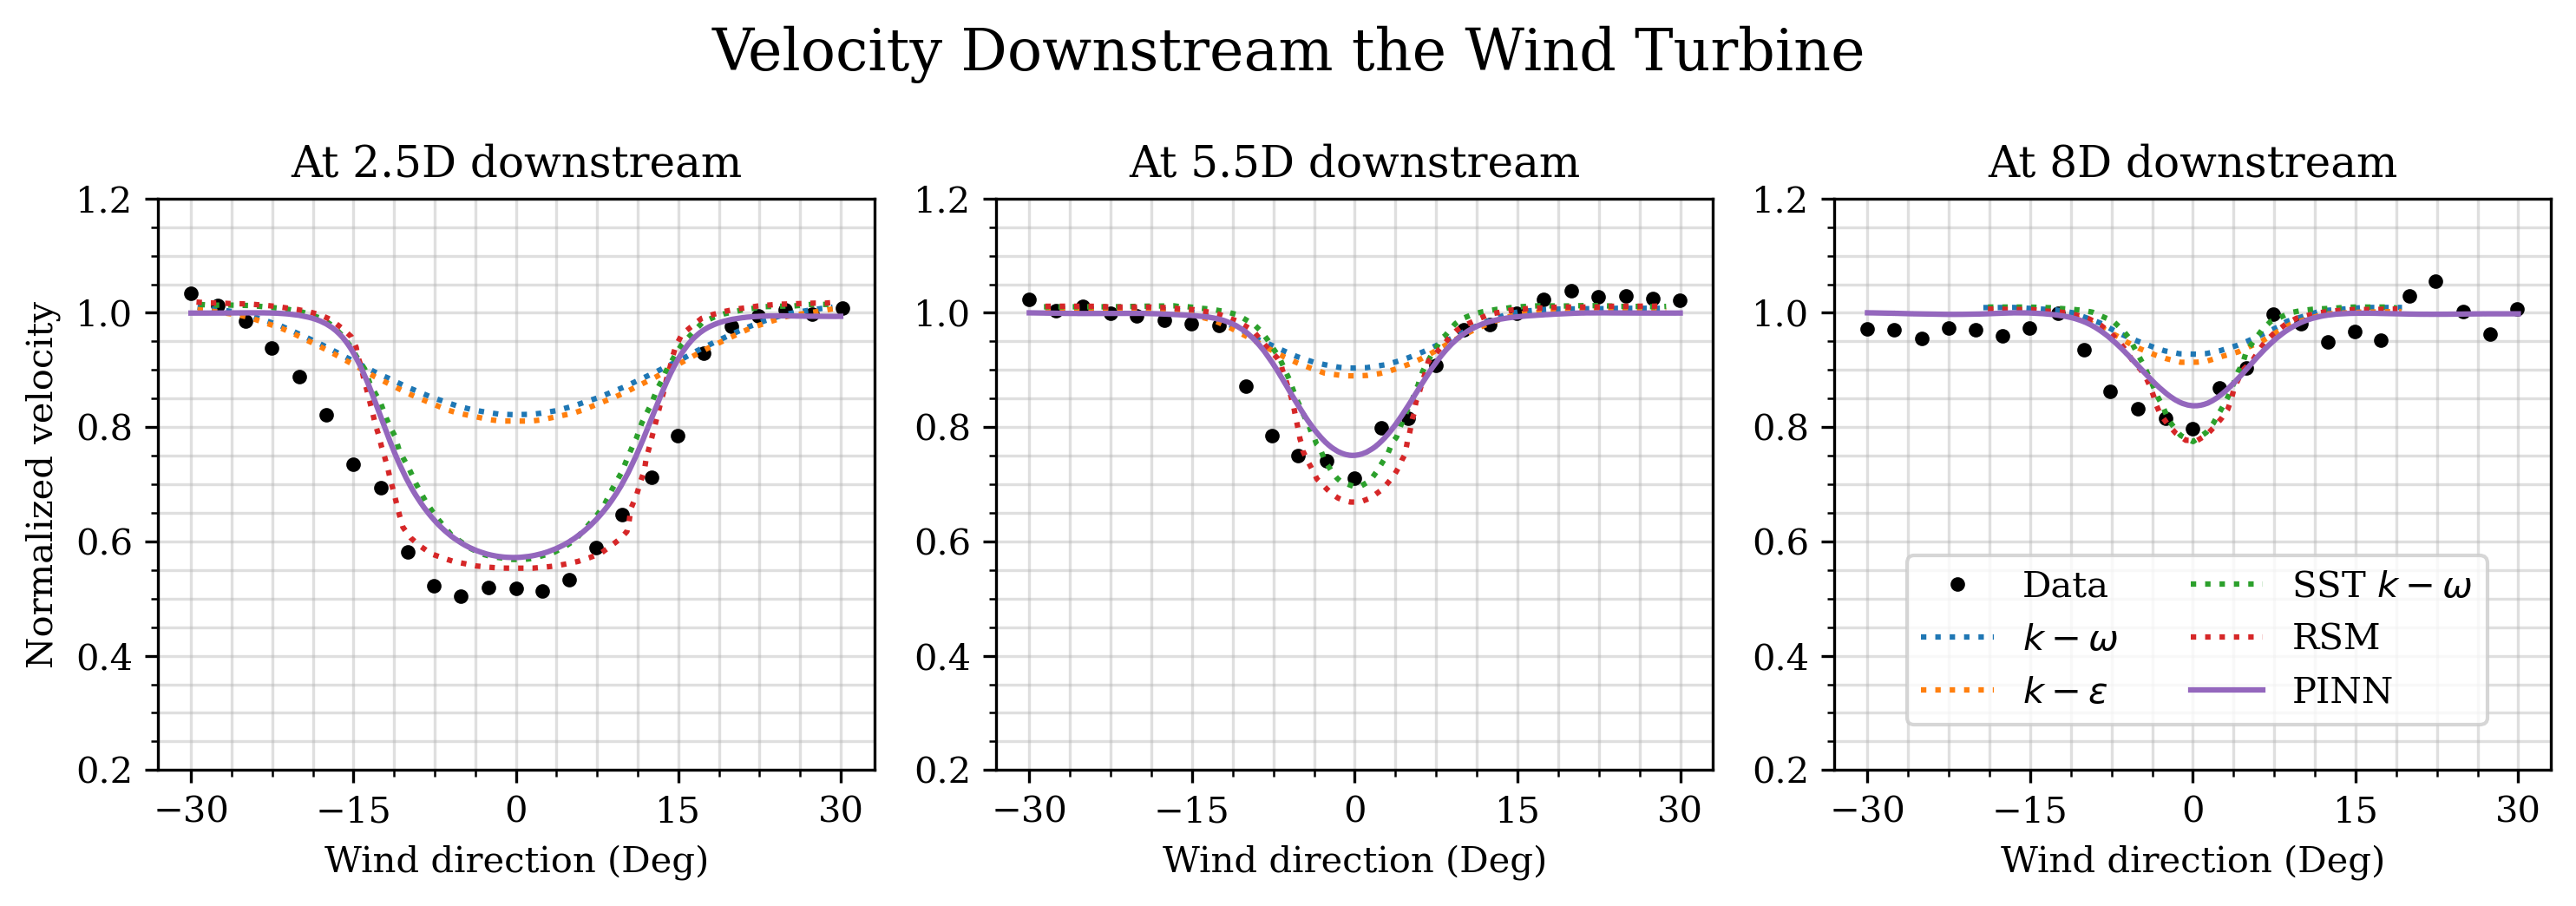

In [6]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.5),dpi=300)

ax[0].plot(theta_data_25D,data_25D,'.k',label = 'Data')
ax[0].plot(theta_kw_25D,kw_25D,':',label = r'$k-\omega$')
ax[0].plot(theta_ke_25D,ke_25D,':',label = r'$k-\epsilon$')
ax[0].plot(theta_sst_25D,sst_25D,':',label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25D,rsm_25D,':',label = r'RSM')
ax[0].plot(angles, u_2_5D/max(u_2_5D), label = 'PINN')
ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'Normalized velocity')
ax[0].set_ylim([.2,1.2])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()
ax[0].set_xticks(np.linspace(-30,30,5))

ax[1].plot(theta_data_4D,data_4D,'.k')
ax[1].plot(theta_kw_4D,kw_4D,':')
ax[1].plot(theta_ke_4D,ke_4D,':')
ax[1].plot(theta_sst_4D,sst_4D,':')
ax[1].plot(theta_rsm_4D,rsm_4D,':')
ax[1].plot(angles, u_5_5D/max(u_5_5D))
ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 5.5D downstream')
ax[1].set_ylim([.2,1.2])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()
ax[1].set_xticks(np.linspace(-30,30,5))


ax[2].plot(theta_data_75D,data_75D,'.k')
ax[2].plot(theta_kw_75D,kw_75D,':')
ax[2].plot(theta_ke_75D,ke_75D,':')
ax[2].plot(theta_sst_75D,sst_75D,':')
ax[2].plot(theta_rsm_75D,rsm_75D,':')
ax[2].plot(angles, u_8D/max(u_8D))
ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 8D downstream')
ax[2].set_ylim([.2,1.2])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()
ax[2].set_xticks(np.linspace(-30,30,5))


fig.legend(loc=(0.74,0.2),ncol=2)
fig.suptitle(fr"Velocity Downstream the Wind Turbine", fontsize=16)
fig.tight_layout()
plt.savefig(f'Plots/Sexbierum_Velocity.png',dpi=300)

# Turbulence Intensity Plots

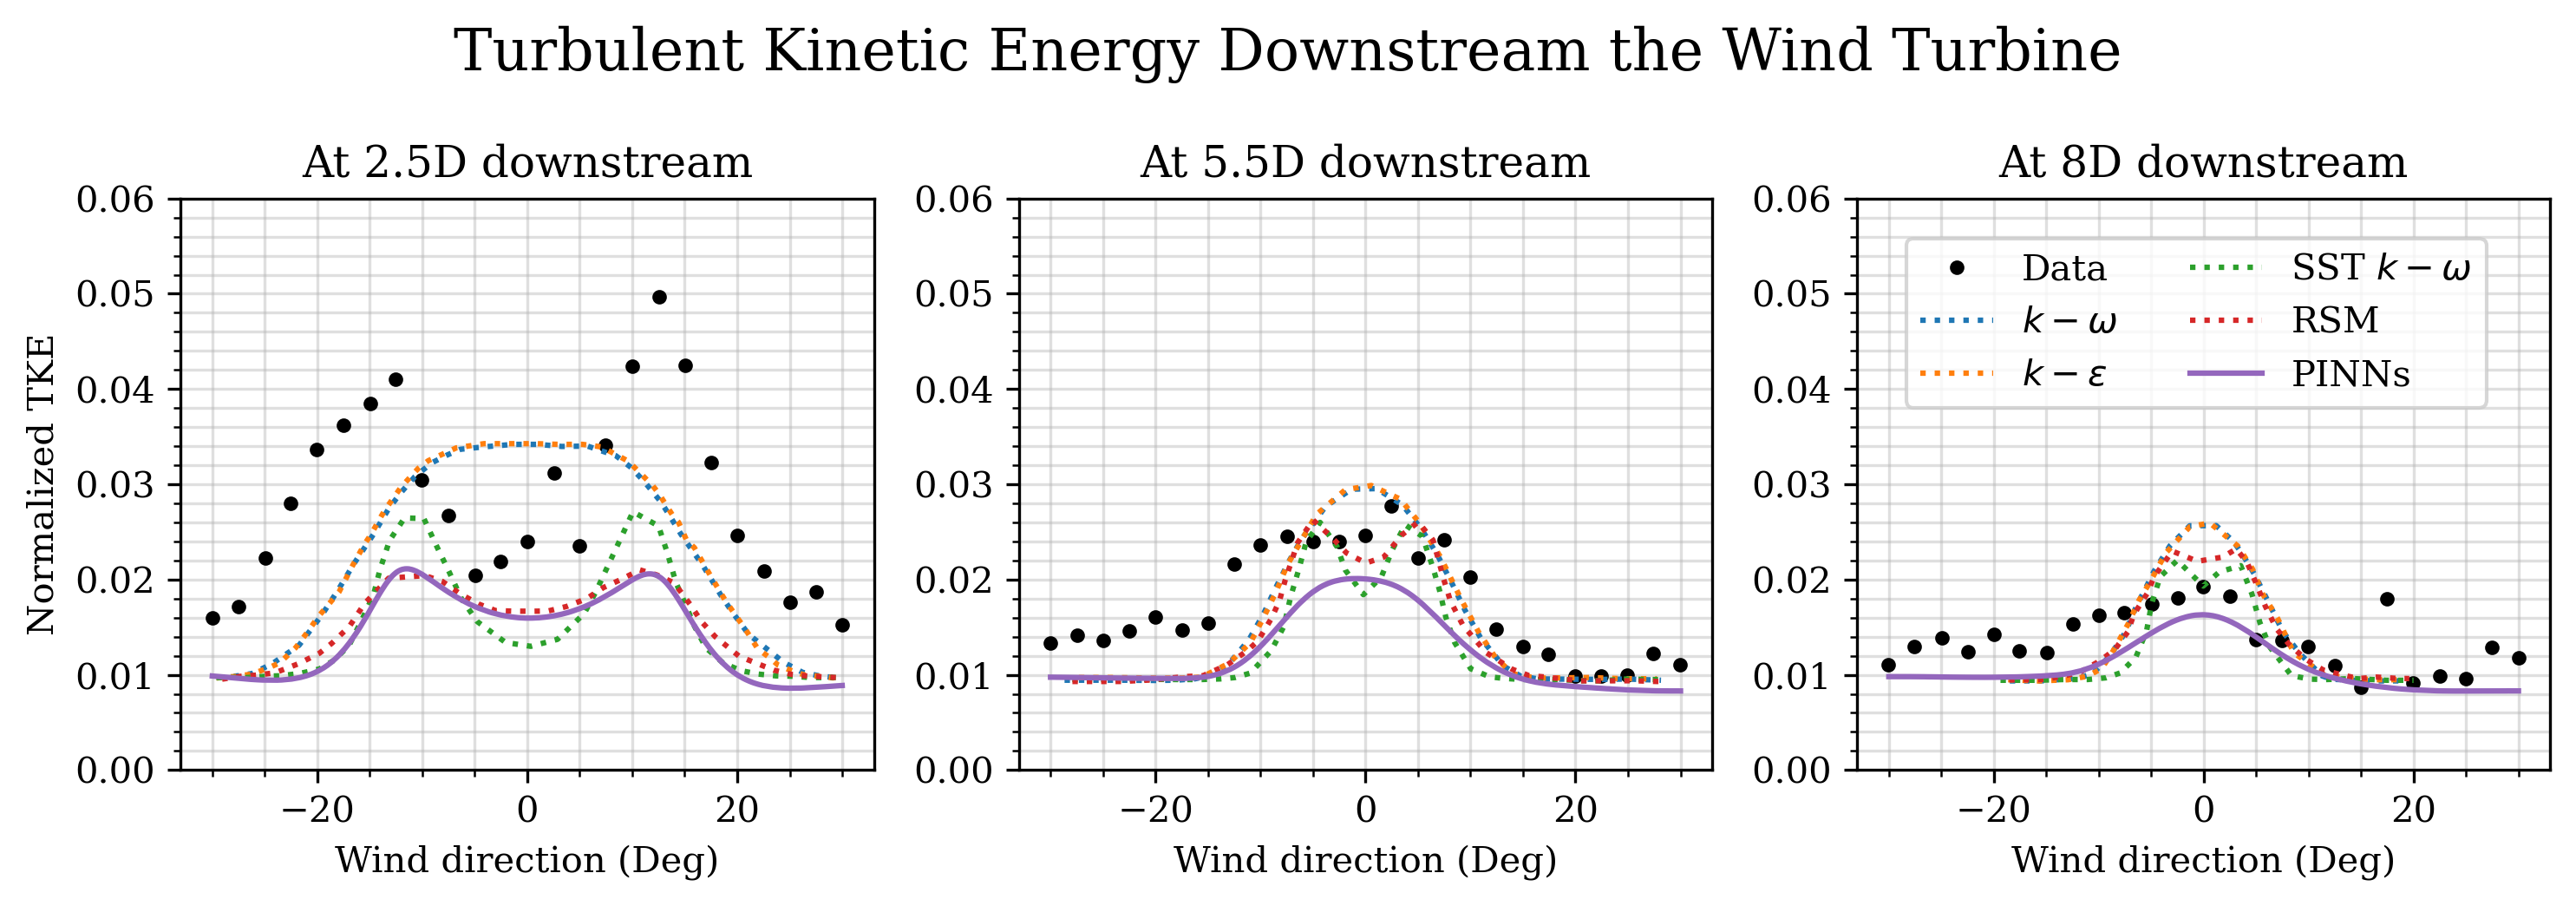

In [11]:
fig, ax = plt.subplots(1, 3, sharex='col',figsize=(10,3.5), dpi=300)

ax[0].plot(theta_data_25DK,data_25DK,'.k',label = 'Data')
ax[0].plot(theta_kw_25DK,kw_25DK,':',label = r'$k-\omega$')
ax[0].plot(theta_ke_25DK,ke_25DK,':',label = r'$k-\epsilon$')
ax[0].plot(theta_sst_25DK,sst_25DK,':',label = r'SST $k-\omega$')
ax[0].plot(theta_rsm_25DK,rsm_25DK,':',label = r'RSM')
ax[0].plot(angles, TKE_2_5D , label = 'PINNs')
ax[0].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[0].set_title(r'At 2.5D downstream')
ax[0].set_ylabel(r'Normalized TKE')
ax[0].set_ylim([.0,.06])
ax[0].grid(which='both',alpha=0.4)
ax[0].minorticks_on()

ax[1].plot(theta_data_4DK,data_4DK,'.k')
ax[1].plot(theta_kw_4DK,kw_4DK,':')
ax[1].plot(theta_ke_4DK,ke_4DK,':')
ax[1].plot(theta_sst_4DK,sst_4DK,':')
ax[1].plot(theta_rsm_4DK,rsm_4DK,':')
ax[1].plot(angles, TKE_5_5D )
ax[1].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[1].set_title(r'At 5.5D downstream')
ax[1].set_ylim([.0,.06])
ax[1].grid(which='both',alpha=0.4)
ax[1].minorticks_on()

ax[2].plot(theta_data_75DK,data_75DK,'.k')
ax[2].plot(theta_kw_75DK,kw_75DK,':')
ax[2].plot(theta_ke_75DK,ke_75DK,':')
ax[2].plot(theta_sst_75DK,sst_75DK,':')
ax[2].plot(theta_rsm_75DK,rsm_75DK,':')
ax[2].plot(angles, TKE_8D )
ax[2].set_xlabel(r'Wind direction (Deg)', fontsize = 10)
ax[2].set_title(r'At 8D downstream')
ax[2].set_ylim([.0,.06])
ax[2].grid(which='both',alpha=0.4)
ax[2].minorticks_on()

fig.legend(loc = (0.74,0.55),ncol=2)
fig.suptitle(fr"Turbulent Kinetic Energy Downstream the Wind Turbine", fontsize=16)
fig.tight_layout()

plt.savefig(f'Plots/Sexbierum_TKE.png',dpi=300)

# Contour Plot Data
Contour plots are generated using ParaView with the data saved in 'Sexbierum_contour_data.csv'

In [8]:
x_grid = 500
y_grid= 200
Radius = 15.05
XX,YY,ZZ = np.meshgrid(np.linspace(-10 * Radius, 25 * Radius,500),np.linspace(-10 * Radius, 10 * Radius,200),np.array([35]))
test_data = [XX.flatten()[:, None], YY.flatten()[:, None], ZZ.flatten()[:, None]]
u,v,w,p,k,eps = act_disc_model.predict(test_data)

3125/3125 [==============================] - 15s 5ms/step


In [9]:
dict = {'x': XX.flatten().tolist(), 'y': YY.flatten().tolist(), 'z': ZZ.flatten().tolist(),
                'u': u.flatten()[:,].tolist(), 'v': v.flatten()[:,].tolist(), 'w': w.flatten()[:,].tolist(),
                  'p': p.flatten()[:,].tolist(), 'k': k.flatten()[:,].tolist(), 'eps': eps.flatten()[:,].tolist()}

df = pd.DataFrame(dict)

df.to_csv(f'Sexbierum_contour_data.csv')

In [10]:
scratch = tf.keras.models.load_model('scratch')
trained = tf.keras.models.load_model('trained')
transfer = tf.keras.models.load_model('transfer')

# angles = np.linspace(-30,30,1001)

R = 15.05

X,Y,Z = np.meshgrid(np.linspace(-10*R,25*R,1001),np.array([0]),np.array([35]))
test_data = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None]))
test_data = tf.cast(test_data,tf.float32)

scratch_pred = scratch.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

trained_pred = trained.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

transfer_pred = transfer.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

OSError: No file or directory found at scratch

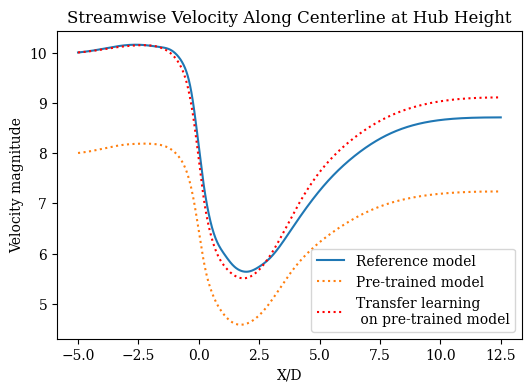

In [ ]:
u_scratch = np.sqrt(np.square(scratch_pred[0])+np.square(scratch_pred[1])+np.square(scratch_pred[2]))
u_base = np.sqrt(np.square(trained_pred[0])+np.square(trained_pred[1])+np.square(trained_pred[2]))
u_transfer = np.sqrt(np.square(transfer_pred[0])+np.square(transfer_pred[1])+np.square(transfer_pred[2]))
plt.figure(figsize=(6,4))
x_data = np.linspace(-5,12.5,1001)
title = 'Streamwise Velocity Along Centerline at Hub Height'
plt.plot(x_data,u_scratch,label = 'Reference model')
plt.plot(x_data,u_base,':',label = 'Pre-trained model')
plt.plot(x_data,u_transfer,':r', label = 'Transfer learning \n on pre-trained model')
plt.title(title)
plt.xlabel('X/D')
plt.ylabel('Velocity magnitude')
# plt.ylim(-0.5,0.5)
plt.legend(fontsize='10',frameon=True)

plt.savefig(f'{title}.pdf',dpi=300, bbox_inches='tight')



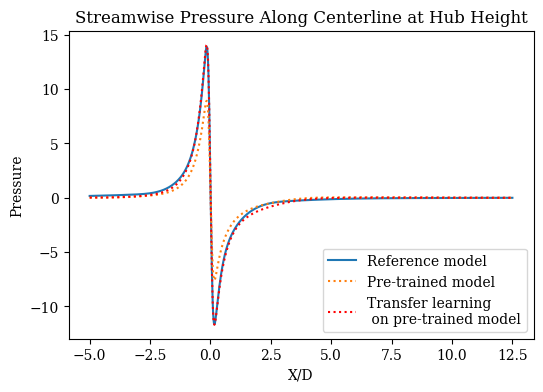

In [ ]:
plt.figure(figsize=(6,4))

title = 'Streamwise Pressure Along Centerline at Hub Height'
plt.plot(x_data,scratch_pred[3],label = 'Reference model')
plt.plot(x_data,trained_pred[3],':',label = 'Pre-trained model')
plt.plot(x_data,transfer_pred[3],':r', label = 'Transfer learning \n on pre-trained model')
plt.title(title)
plt.xlabel('X/D')
plt.ylabel('Pressure')
# plt.ylim(-0.5,0.5)
plt.legend(loc='lower right')

plt.savefig(f'{title}.pdf',dpi=300, bbox_inches='tight')